# Monte Carlo micromagnetics driver

This non-parallelised Monte Carlo micromagnetics driver is the work of the first stage of my master's project. 
The goal of this project is to eventually integrate any work into the Ubermag[1, 2] umbrella API for micromagnetic simulations. 
Thus, this preliminary simulation framework mostly mimics the functionality and syntax of classes used in the `discretisedfield` and `micromagneticmodel` modules in Ubermag.
It also builds in robustness for further development of parallelised algorithms but deconstructing the interactions that have a neighbour-dependency (exhcange, DMI) into $x$, $y$, and $z$ components.
This driver also allows for the user to input whether the magnetic parameters should be interpreted as continuous or atomistic; atomistic equations are helpful for by-hand calculations and the continuous equations are the atomistics equations in the limit discretised in a stencil that only makes use of neighbouring cells.

For more background information on the micromagnetic equations and the conversion equations, see the PDF in the project repository.

## Monte Carlo algorithm in micromagnetic simulations

The discretisation nodes correspond to arrays. This algorithm sequentially uniformly, randomly proposes an atom whose magnetic moment will be perturbed uniformly and randomly across the unit sphere.

## API design

- `Mesh` encapsulates (cuboid) domain dimensions and discretisation nodes
- `System` encapsulates the system properties like the mesh, magnetisations, magnetic saturation (norm) and temperature, and magnetic parameters (contained in a respective class such as `Zeeman`); it also has plotting functionality for the magnetisations
- `Simulation` encapsulates the driving functionality and energy tracker

## Demonstration

In this simple example, we will subject the material to an external magnetic field and then reverse the field.

In [1]:
%matplotlib inline

# Import classes from the driver
import MMCMag.MMC_driver as mmc
import matplotlib.pyplot as plt

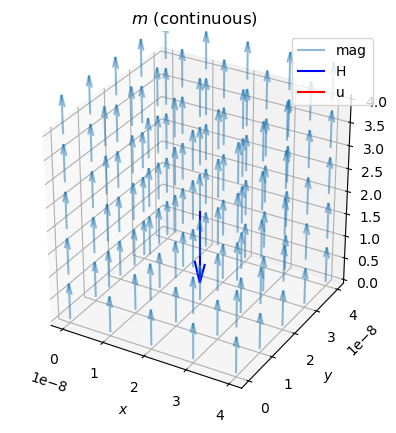

In [2]:
# Domain dimensions and discretisation (mesh)
Lx, Ly, Lz = 40e-9, 40e-9, 40e-9  # Physical dimensions (nanoscale)
Nx, Ny, Nz = 5, 5, 5  # Nodes
mesh = mmc.Mesh((Lx, Ly, Lz), (Nx, Ny, Nz))  # Mesh object

# System properties
Ms = 384e3  # Magnetic saturation (called "norm" in Ubermag)
T = 0  # System temperature
system = mmc.System(
    Ms, T, mesh, mag_status=3, is_atomistic=False
)  # Uniform x-direction initialisation, continnuous interpretation of constants

# Magnetic parameters
H = (0, 0, -3e10)  # External field (Zeeman interaction)
K = 0  # Anisotropy constant
u = (0, 0, 0)  # Anisotropy axis
A = 8.78e-12  # Exchange constant
D = 1.58e-3  # DMI constant

# Add/update parameters to the system
system.add_zeeman(H)
system.add_ua(K, u)
system.add_exchange(A)
system.add_dmi(D)

# Plot the system
system.plot_quiver()

Iteration 1000/10000 complete
Iteration 2000/10000 complete
Iteration 3000/10000 complete
Iteration 4000/10000 complete
Iteration 5000/10000 complete
Iteration 6000/10000 complete
Iteration 7000/10000 complete
Iteration 8000/10000 complete
Iteration 9000/10000 complete
Iteration 10000/10000 complete
Time elapsed for MMC: 1.2677602767944336s
Simulation complete


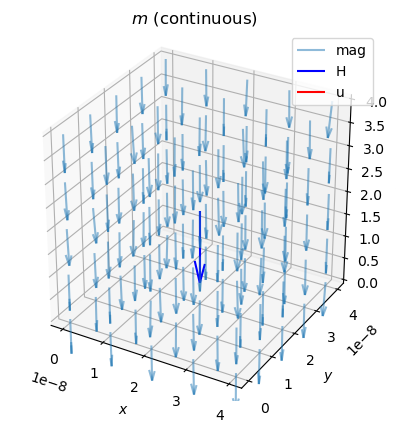

In [3]:
# Initialise the simulation with the system object
simulation = mmc.Simulation(system)

# Simulate for 1e4 iterations and plot
its = 1e4
simulation.run_MMC(its)
simulation.system.plot_quiver()

Iteration 11000/20000 complete
Iteration 12000/20000 complete
Iteration 13000/20000 complete
Iteration 14000/20000 complete
Iteration 15000/20000 complete
Iteration 16000/20000 complete
Iteration 17000/20000 complete
Iteration 18000/20000 complete
Iteration 19000/20000 complete
Iteration 20000/20000 complete
Time elapsed for MMC: 1.2511909008026123s
Simulation complete


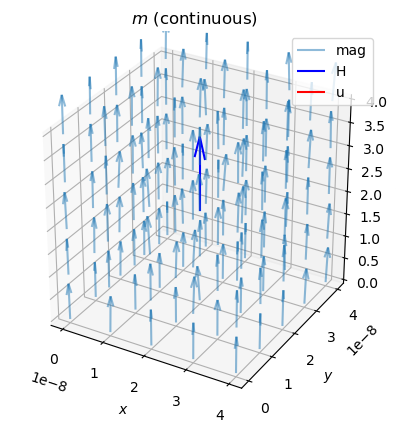

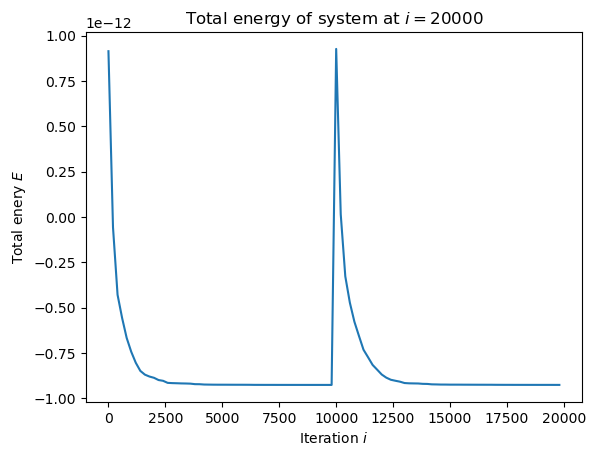

In [4]:
# Reverse external field
H_rev = (0, 0, 3e10)
simulation.system.add_zeeman(H_rev)  # Update external field

# Simulate for a futher 1e4 iterations and plot
simulation.run_MMC(its)
simulation.system.plot_quiver()
simulation.plot_energy_tracker()

## Simulating a skyrmion in a nanodisc

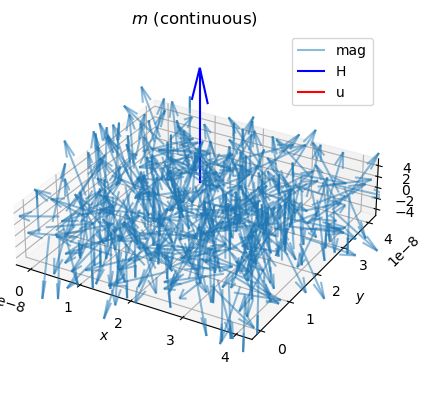

Iteration 100000/1000000 complete
Iteration 200000/1000000 complete
Iteration 300000/1000000 complete
Iteration 400000/1000000 complete
Iteration 500000/1000000 complete
Iteration 600000/1000000 complete
Iteration 700000/1000000 complete
Iteration 800000/1000000 complete
Iteration 900000/1000000 complete
Iteration 1000000/1000000 complete
Time elapsed for MMC: 98.96050190925598s
Simulation complete


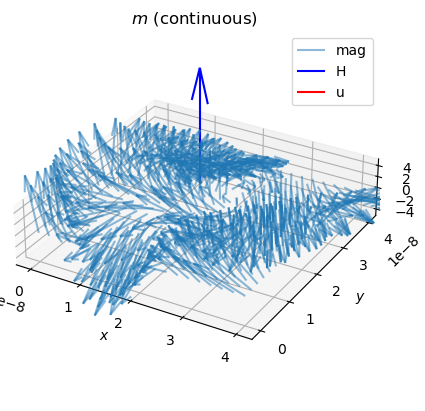

In [17]:
# Domain dimensions and discretisation (mesh)
Lx, Ly, Lz = 40e-9, 40e-9, 10e-9  # Physical dimensions (nanoscale)
Nx, Ny, Nz = 20, 20, 1  # Nodes
mesh = mmc.Mesh((Lx, Ly, Lz), (Nx, Ny, Nz))  # Mesh object

# System properties
Ms = 384e3  # Magnetic saturation (called "norm" in Ubermag)
T = 0  # System temperature
system = mmc.System(
    Ms, T, mesh, mag_status=0, is_atomistic=False
)  # Uniform x-direction initialisation, continnuous interpretation of constants

# Magnetic parameters
H = (0, 0, 3e5)  # External field (Zeeman interaction)
K = 0  # Anisotropy constant
u = (0, 0, 0)  # Anisotropy axis
A = 8.78e-12  # Exchange constant
D = 1.58e-3  # DMI constant

# Add/update parameters to the system
system.add_zeeman(H)
system.add_ua(K, u)
system.add_exchange(A)
system.add_dmi(D)

# Simulation
system.plot_quiver()
simulation = mmc.Simulation(system)
simulation.run_MMC(1e6)
simulation.system.plot_quiver()

## References

[1] Marijan Beg, Ryan A. Pepper, and Hans Fangohr. User interfaces for computational science: A domain specific language for OOMMF embedded in Python. _AIP Advances_, 7(5):056025, May 2017.

[2] H. Fangohr M. Beg, M. Lang. Ubermag: Towards more effective micromagnetic work-flows. _IEEE Transactions on Magnetics 58_, 7300205, 2022